# iris 데이터 주성분 분석 후 분류하기

In [43]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [44]:
from sklearn.model_selection import train_test_split
X, y = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)  

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [46]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

In [47]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues : %s' % eigen_vals)

Eigenvalues : [2.8998938  0.98708902 0.13466453 0.01681419]


In [48]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
var_exp

[0.71806894055277,
 0.24442204363321526,
 0.03334550252484883,
 0.004163513289165912]

In [49]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.71806894, 0.96249098, 0.99583649, 1.        ])

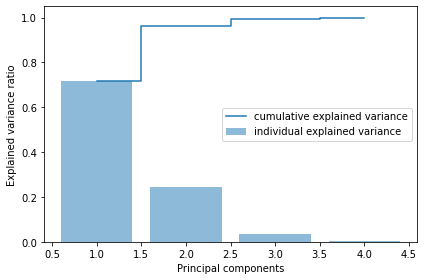

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, 5), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [51]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(2.899893798386186,
  array([ 0.53547007, -0.20428207,  0.58615942,  0.57267597])),
 (0.9870890223649076,
  array([-3.25785192e-01, -9.44860554e-01,  7.51890810e-04, -3.31960469e-02])),
 (0.13466452942727408,
  array([-0.73207448,  0.23052807,  0.13736953,  0.62614166])),
 (0.016814188283170026,
  array([ 0.26683847, -0.11119432, -0.79846489,  0.52809741]))]

In [52]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 5.35470073e-01 -3.25785192e-01]
 [-2.04282071e-01 -9.44860554e-01]
 [ 5.86159424e-01  7.51890810e-04]
 [ 5.72675970e-01 -3.31960469e-02]]


In [53]:
X_train_pca = X_train_std.dot(w)

In [54]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

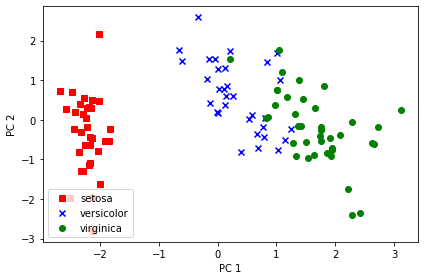

In [55]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [56]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30))
mlp.fit(X_train_pca, y_train)

C:\Users\COM\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 30))

In [57]:
print(mlp.score(X_train_pca, y_train))

0.9333333333333333


In [58]:
X_test_pca = X_test_std.dot(w)
pred = mlp.predict(X_test_pca)
pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype='<U10')

In [59]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, pred, margins=True,
                               rownames=['True'], colnames=['Pred'])
confusion_matrix

Pred,setosa,versicolor,virginica,All
True,,,,
setosa,16,0,0,16
versicolor,0,15,3,18
virginica,0,0,11,11
All,16,15,14,45


In [60]:
print(mlp.score(X_test_pca, y_test))

0.9333333333333333


# PCA를 이용해서 얼굴 주성분 분석하기

In [12]:
# from imageio import imread
from skimage import io
import glob
imgs = []
for image_path in glob.glob("../../data/image/image/korean_beauty/*.png"):
#     image = imread(image_path)
    image = io.imread(image_path, as_gray=True)
    imgs.append(image)

In [13]:
import numpy as np
N = len(imgs) #이미지의 개수
images = np.array(imgs)

In [14]:
origin_shape = images.shape

In [15]:
origin_shape

(20, 35, 30)

In [5]:
fig_size = (origin_shape[2], origin_shape[1])
fig_size

(30, 35)

In [6]:
images.shape = (N, -1)
images.shape

(20, 1050)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
images_std = sc.fit_transform(images)
images_std

array([[-0.34846806, -0.64595379,  0.31760955, ..., -1.39434474,
        -1.18364742, -1.11041408],
       [ 0.67771125,  1.94825646,  1.77498085, ..., -1.50651352,
        -1.49234078, -1.39898864],
       [-0.08074358, -0.51207572, -0.73079353, ...,  0.82449157,
         0.73738828,  0.9538411 ],
       ...,
       [-0.64968146, -0.6966082 , -0.99570981, ..., -0.61142541,
        -1.36434192, -1.43529639],
       [ 0.28960996, -0.21467105, -0.66305684, ...,  0.84051043,
         0.71770162,  0.34472421],
       [-0.67518412, -0.73399219, -1.02074743, ...,  0.20354346,
        -1.03574422, -1.58445642]])

In [8]:
import numpy as np
cov_mat = np.cov(images_std)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [9]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

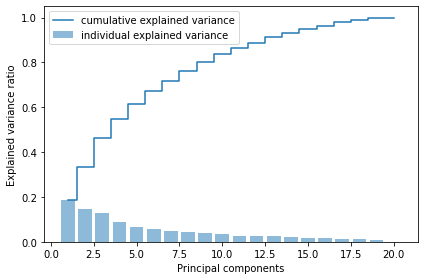

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, N+1), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(1, N+1), cum_var_exp, where='mid', 
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [11]:
eigen_pairs = [(np.abs(eigen_vals[i]), 
                eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=False)

In [12]:
w = eigen_pairs[0][1][:, np.newaxis]
for i in range(1,N):
    w = np.hstack((w,eigen_pairs[i][1][:, np.newaxis]))


In [13]:
print('Matrix W:\n', w)

Matrix W:
 [[ 2.23606798e-01 -2.30446865e-01  2.11017560e-01  2.03412770e-01
   2.47971446e-02 -5.54192500e-01  1.33845339e-02 -8.53830817e-02
   1.73199093e-03  2.03607514e-01  1.82260567e-01 -1.96257933e-02
   5.75528038e-02  1.78009974e-01  2.54568256e-01 -2.25789263e-01
   4.79072093e-01  1.89632082e-01  1.78412928e-02 -6.43269432e-02]
 [ 2.23606798e-01 -1.46150839e-01  1.39068237e-01  4.78264540e-02
   8.69062065e-02  1.41575840e-01  3.64276739e-01 -2.23630634e-01
   7.91599885e-03  2.81333614e-01 -3.17054694e-01 -1.58989180e-01
   7.43483446e-02 -3.24528568e-01  2.28132852e-01  2.44611058e-01
  -3.06669911e-02  1.28478738e-01  1.00970256e-02  5.01418625e-01]
 [ 2.23606798e-01 -2.86693730e-01 -6.63908273e-02  4.69685230e-02
   4.63098400e-02  2.40602117e-01 -1.33638050e-01  4.84139447e-01
   3.90841448e-01  1.84249017e-01 -3.66632239e-02 -2.96945066e-01
   2.37907737e-02  1.89080989e-01  2.75593874e-01 -1.96135233e-02
  -2.40987291e-02 -3.93555221e-01 -3.77334605e-02 -5.60262082e-

In [137]:
images_pca = images_std.T @ w
images_pca.shape

(1050, 20)

In [138]:
result = images_pca.T
result

array([[ 1.40988134e-15, -1.44317886e-16, -1.25841272e-15, ...,
        -4.70887239e-16, -2.64901642e-16,  1.89966836e-15],
       [ 1.79356711e-01,  2.23372832e-02,  6.07306229e-03, ...,
        -4.05934131e-02, -4.56183971e-02, -1.11519402e-01],
       [ 8.39842208e-01,  2.95128229e-01,  1.98750934e-01, ...,
         7.55725338e-01,  6.91592851e-01,  6.94554169e-01],
       ...,
       [ 1.79941549e+00,  1.66416412e+00,  1.79132166e+00, ...,
        -2.07016564e+00, -2.03417259e+00, -1.93797791e+00],
       [ 2.67281261e-01, -4.28811844e-01, -5.37148222e-01, ...,
         1.21727181e+00,  1.57974752e+00,  1.38464373e+00],
       [ 2.62195025e-01,  3.22855379e+00,  3.22610750e+00, ...,
        -2.14626146e+00, -1.78128238e+00, -1.68331120e+00]])

In [139]:
result_img = sc.inverse_transform(result)
result_img.shape

(20, 1050)

In [140]:
result_img.shape = origin_shape
result_img.shape

(20, 35, 30)

In [141]:
# result_img = result_img.astype(np.uint8)

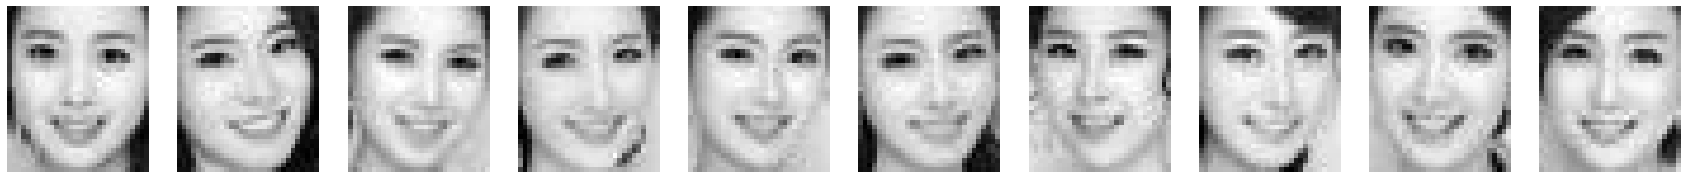

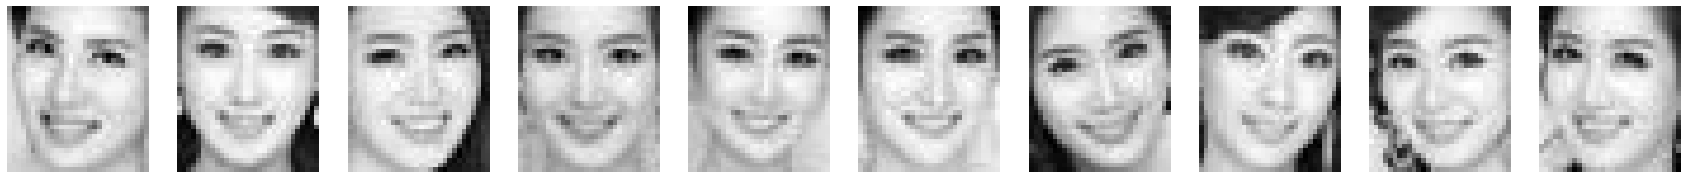

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
images.shape = origin_shape
nrows = (N//10)
for row in range(nrows):
    plt.figure(figsize=fig_size)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i + row*10], cmap="gray")
        plt.axis("off")
    plt.show()

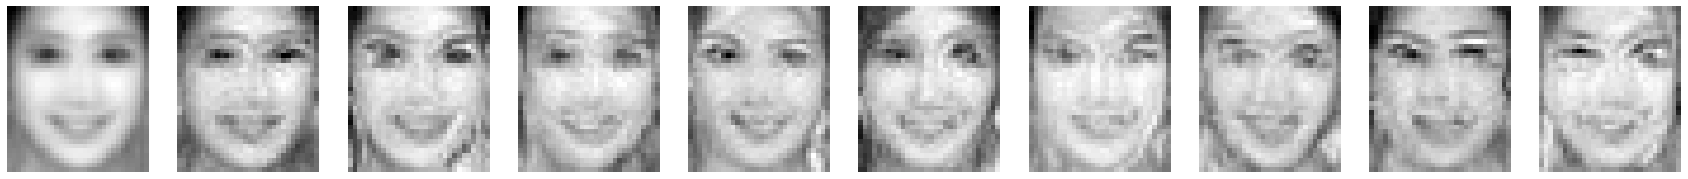

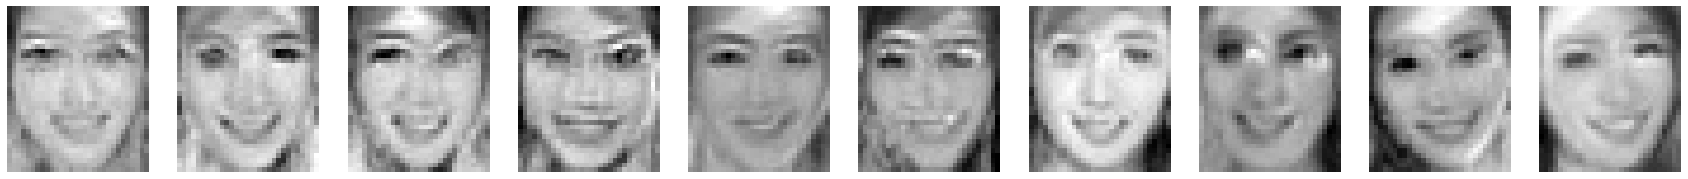

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
nrows = (N//10)
for row in range(nrows):
    plt.figure(figsize=fig_size)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(result_img[i + row*10], cmap="gray")
        plt.axis("off")
    plt.show()

# 특잇값 분해

# 분류 모형의 변수 선택

In [16]:
import pandas as pd
redwine = pd.read_csv('winequality-red.csv', delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
X = redwine.iloc[:, :-1];
y = redwine.iloc[:, -1]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

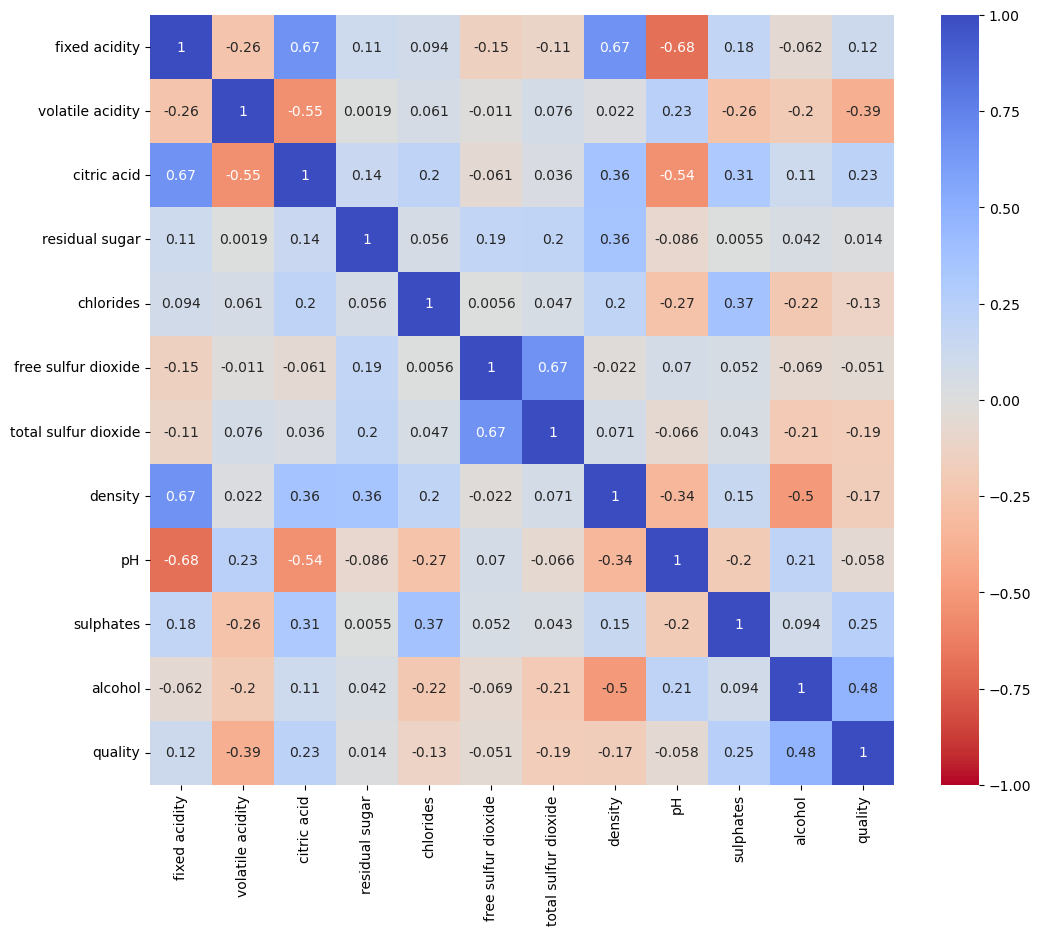

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(redwine.corr(), annot=True, 
            vmin=-1, vmax=1, cmap="coolwarm_r")
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [20]:
rf_model.feature_importances_

array([0.07679351, 0.10421786, 0.07802557, 0.06573503, 0.07706915,
       0.06138852, 0.10841369, 0.09313385, 0.07038339, 0.10917441,
       0.15566503])

In [21]:
import numpy as np
np.sum(rf_model.feature_importances_)

1.0000000000000002

In [22]:
features = pd.DataFrame(data=np.c_[X.columns,
                                   rf_model.feature_importances_],
                        columns=["feature", "importance"])

In [23]:
features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.155665
1,sulphates,0.109174
2,total sulfur dioxide,0.108414
3,volatile acidity,0.104218
4,density,0.093134
5,citric acid,0.078026
6,chlorides,0.077069
7,fixed acidity,0.076794
8,pH,0.070383
9,residual sugar,0.065735


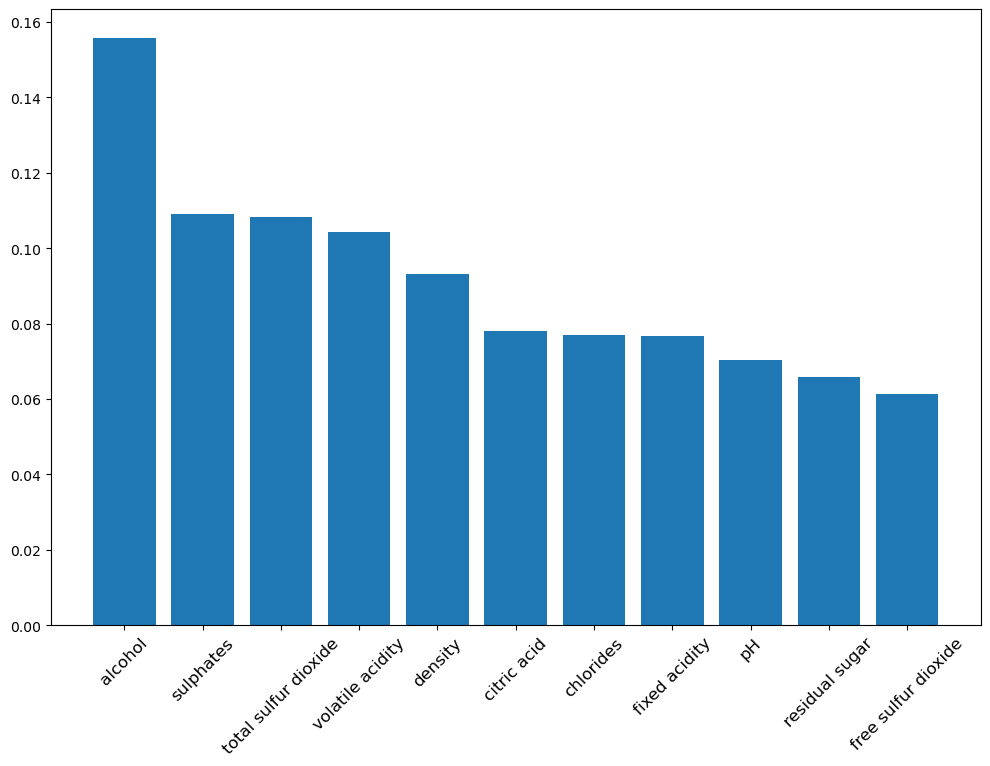

In [24]:
plt.figure(figsize=(12, 8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

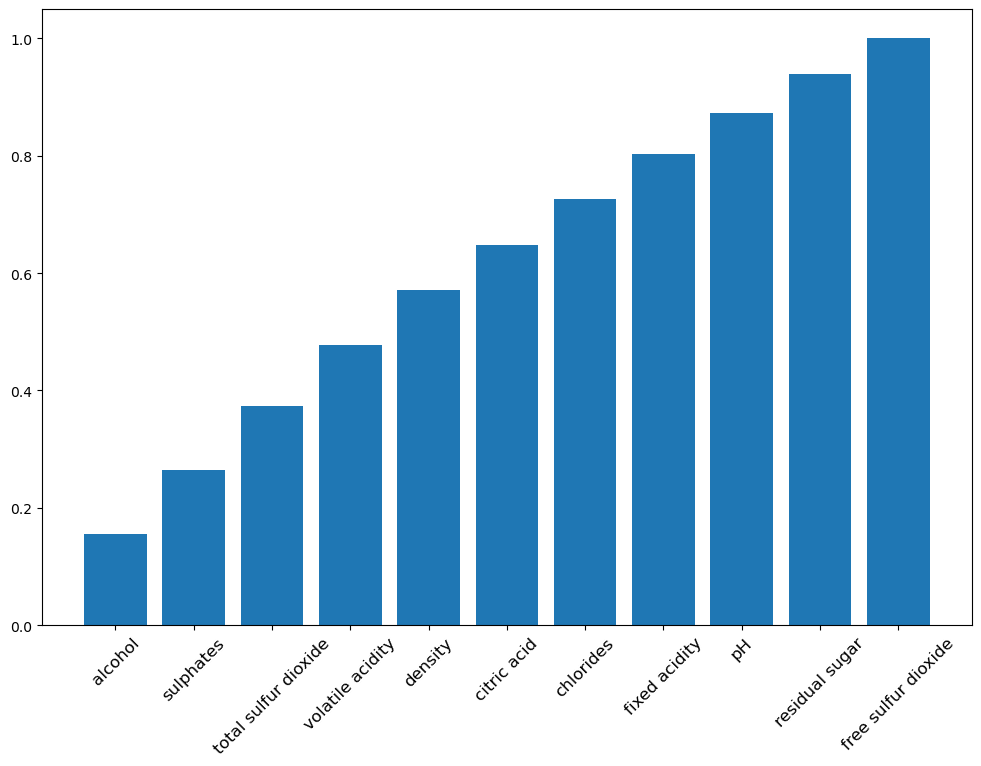

In [25]:
y_stack = np.cumsum(features.importance, axis=0)
plt.figure(figsize=(12, 8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rfe_model = RFE(rf_model, n_features_to_select=5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [27]:
rfe_model.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
        True,  True])

In [28]:
import numpy as np
import pandas as pd
features_rfe = pd.DataFrame(data=np.c_[X.columns.values, 
                                       rfe_model.get_support()],
                            columns=["feature", "selected"])
features_rfe.sort_values(by="selected", ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
8,pH,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


In [29]:
features.merge(features_rfe)

,feature,importance,selected
0,alcohol,0.155665,True
1,sulphates,0.109174,True
2,total sulfur dioxide,0.108414,True
3,volatile acidity,0.104218,True
4,density,0.093134,False
5,citric acid,0.078026,False
6,chlorides,0.077069,False
7,fixed acidity,0.076794,False
8,pH,0.070383,True
9,residual sugar,0.065735,False


In [30]:
import pickle
with open("rfe.model", "wb") as f:
    pickle.dump(rfe_model, f)

In [31]:
import pickle
with open("rfe.model", "rb") as f:
    rfe_model = pickle.load(f)

In [32]:
rfe_model.predict(test_X[:10])

array([5, 6, 8, 6, 6, 6, 6, 5, 5, 6], dtype=int64)

In [33]:
test_y[:10].values

array([5, 6, 6, 6, 6, 6, 6, 5, 5, 5], dtype=int64)

# 회귀모형의 변수 선택

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.coef_

array([ -7.24560918,   6.07841138,   1.61419961,   2.43955988,
       -10.43440297,  14.59135251,   0.33601219, -16.67429358,
         7.07346015,  -5.91072872,  -9.45138418,   2.55801415,
       -20.61456368])

In [37]:
import pandas as pd
import numpy as np
features = pd.DataFrame(np.c_[boston.feature_names, lr.coef_],
                        columns = ['feature', 'coef'])

In [38]:
features.sort_values("coef", ascending=False, inplace=True)
features

,feature,coef
8,RAD,7.073460145683998
1,ZN,6.078411384243512
11,B,2.5580141534966128
3,CHAS,2.4395598751548504
5,RM,14.591352506822624
2,INDUS,1.6141996129903846
6,AGE,0.3360121909384357
10,PTRATIO,-9.451384184058607
0,CRIM,-7.245609178578958
9,TAX,-5.91072871694803


# SelectKBest

In [39]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [40]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

In [41]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [42]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

# 평균값 인코딩의 오버피팅 해결

In [43]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
sex_mean = titanic.groupby("sex")["survived"].mean()
titanic['sex_mean'] = titanic['sex'].map(sex_mean) 

In [44]:
titanic['sex_n_rows'] = titanic['sex'].map(titanic.groupby('sex').size())
global_mean = titanic["survived"].mean()
alpha = 0.7
def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)
titanic['sex_mean_smoothing'] = titanic.apply(
    lambda x:smoothing(x['sex_n_rows'], 
                       x['sex_mean']), axis=1)
titanic[['sex_mean', 'sex_mean_smoothing']].head()

,sex_mean,sex_mean_smoothing
0,0.188908,0.189144
1,0.742038,0.741241
2,0.742038,0.741241
3,0.742038,0.741241
4,0.188908,0.189144


In [45]:
from sklearn.model_selection import train_test_split
import numpy as np

train, test = train_test_split(titanic, test_size=0.2, 
                               random_state=42, shuffle=True)

# train -> train_new 로 될 예정. 미리 데이터프레임 만들어주기.
train_new = train.copy()
train_new[:] = np.nan
train_new['sex_mean'] = np.nan
from sklearn.model_selection import StratifiedKFold

# Kfold 만들어 주기.
X_train = train.drop("survived", axis=1)
Y_train = train["survived"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 각 Fold iteration.
for tr_idx, val_idx in skf.split(X_train, Y_train):
    X_train, X_val = train.iloc[tr_idx], train.iloc[val_idx]

    # train set 에서 구한 mean encoded 값을 validation set 에 매핑해줌.
    means = X_val['sex'].map(X_train.groupby('sex')["survived"].mean())
    X_val['sex_mean'] = means
    train_new.iloc[val_idx] = X_val

# 폴드에 속하지못한 데이터들은 글로벌 평균으로 채워주기.
global_mean = train["survived"].mean()
train_new['sex'] = train_new['sex'].fillna(global_mean)
train_new[['sex', 'sex_mean']].head()

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_11680\3349723014.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['sex_mean'] = means
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_11680\3349723014.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['sex_mean'] = means
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_11680\3349723014.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,sex,sex_mean
331,male,0.184987
733,male,0.193029
382,male,0.177419
704,male,0.184000
813,female,0.751269


array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>]], dtype=object)

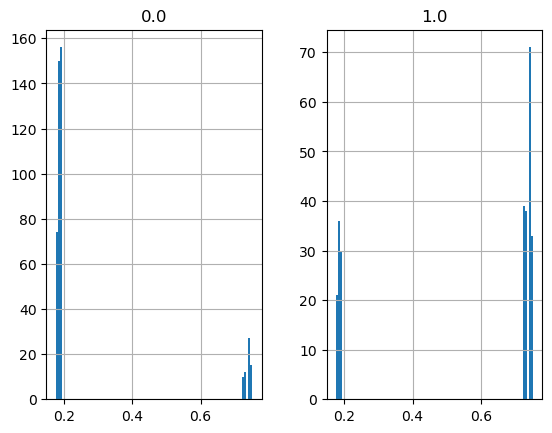

In [46]:
train_new.pivot_table(columns="survived", 
                      index=train_new.index, 
                      values='sex_mean').hist(bins=100)

In [47]:
cumsum = train.groupby('sex')["survived"].cumsum() - train["survived"] 
cumcnt = train.groupby('sex').cumcount() + 1 
train_new['sex_mean'] = cumsum / cumcnt

In [48]:
train_new[['sex','sex_mean']].tail()

,sex,sex_mean
106,female,0.733607
270,male,0.187097
860,male,0.186695
435,female,0.734694
102,male,0.186296


array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>]], dtype=object)

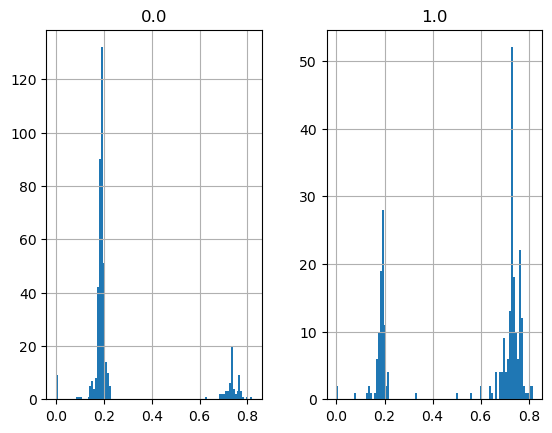

In [49]:
train_new.pivot_table(columns="survived", 
                      index=train_new.index, 
                      values='sex_mean').hist(bins=100)

### validation_curve

In [50]:
# red wine 데이터를 사용
import pandas as pd
redwine = pd.read_csv("http://javaspecialist.co.kr/pds/297", delimiter=';')
redwine_x = redwine.iloc[:,:-1]
redwine_y = redwine.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(redwine_x, redwine_y, 
                                                    test_size=0.3)

In [52]:
X_train.shape

(1119, 11)

In [53]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(shuffle=False, random_state=1)
model.fit(X_train, y_train)

c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1, shuffle=False)

In [54]:
model.score(X_test, y_test)

0.5854166666666667

In [55]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(shuffle=False, random_state=1,
                      hidden_layer_sizes=(50,30))
model.fit(X_train, y_train)
model.score(X_test, y_test)

c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5791666666666667

In [56]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(shuffle=False, 
                      hidden_layer_sizes=(50,30,10), random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6020833333333333

In [57]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,), shuffle=False, random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5854166666666667

In [58]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: Consolas; font-size: 16pt;}
div.output { font-size: 16pt; font-weight: bold;}
div.input { font-family: Consolas; font-size: 16pt;}
div.prompt { min-width: 100px;}
</style>
"""))

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_11680\486238426.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [59]:
import numpy as np
param_range = np.logspace(-6, -1, 10)

In [60]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", 
    param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

CPU times: total: 41.8 s
Wall time: 43.3 s


In [61]:
import numpy as np
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

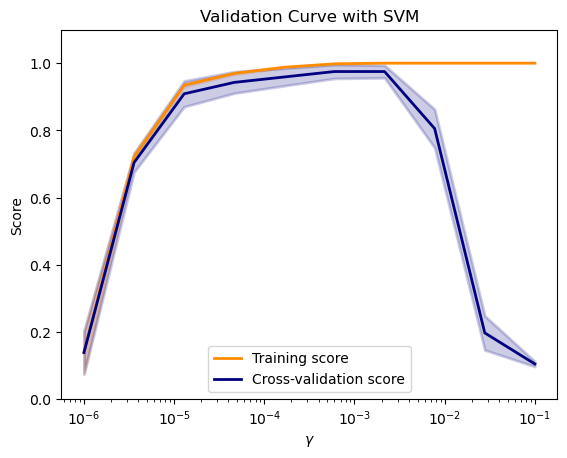

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [63]:
gamma = param_range[test_scores_mean.argmax()]
from sklearn.svm import SVC
model = SVC(gamma=gamma).fit(X, y)
model

SVC(gamma=0.0021544346900318843)

In [64]:
model.score(X, y)

1.0

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.95833333, 0.94444444, 0.98050139, 0.99164345, 0.95264624])

# GridSearchCV

In [66]:
from __future__ import print_function
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris = load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
selection = SelectKBest(k=1)
combined_features = FeatureUnion([("pca", pca), 
                                  ("univ_select", selection)])

# 결합한 특징들을 transform() 데이터셋으로 사용합니다.
X_features = combined_features.fit(X, y).transform(X)
# print("Combined space has", X_features.shape[1], "features")

svm = SVC(kernel="linear")


In [67]:
%%time
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])

param_grid = dict(univ_select__k=[1, 2, 3, 4, 5],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, 
                           cv=5, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 1/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=0.967 total time=   0.0s
[CV 2/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 2/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=1.000 total time=   0.0s
[CV 3/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 3/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=0.833 total time=   0.0s
[CV 4/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 4/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=0.933 total time=   0.0s
[CV 5/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 5/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=1.000 total time=   0.0s
[CV 1/5; 2/15] START svm__C=0.1, univ_select__k=2...............................
[CV 1/5; 2/15] END svm__C=0.1, univ_select__k=2;

c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\SBAUser\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\SBAUs

In [68]:
model = grid_search.best_estimator_

In [69]:
pred = model.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
model.get_params()

{'memory': None,
 'steps': [('univ_select', SelectKBest(k=3)),
  ('svm', SVC(C=1, kernel='linear'))],
 'verbose': False,
 'univ_select': SelectKBest(k=3),
 'svm': SVC(C=1, kernel='linear'),
 'univ_select__k': 3,
 'univ_select__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'svm__C': 1,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'linear',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [71]:
from __future__ import print_function
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
import pandas as pd

redwine = pd.read_csv("winequality-red.csv", sep=";")
X, y = redwine.iloc[:,:-1], redwine.iloc[:,-1]

selection = SelectKBest(k=1)
svm = SVC(kernel="linear")

In [ ]:
%%time
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])

param_grid = dict(univ_select__k=[4, 5, 6, 7, 8, 9, 10, 11],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, 
                           cv=5, verbose=10, n_jobs=-1)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

### ParameterGrid

In [ ]:
# red wine 데이터를 사용
import pandas as pd
redwine = pd.read_csv("http://javaspecialist.co.kr/pds/297", delimiter=';')
redwine_x = redwine.iloc[:,:-1]
redwine_y = redwine.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(redwine_x, redwine_y, 
                                                    test_size=0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()

In [ ]:
params = {"mlp__hidden_layer_sizes":[(20,), (50,), (50, 30), (50, 30, 10)],
          "mlp__activation": ["tanh", "relu"]}

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = ParameterGrid(params)

In [ ]:
list(param_grid)

### GridSearchCV

In [ ]:
# red wine 데이터를 사용
import pandas as pd
redwine = pd.read_csv("http://javaspecialist.co.kr/pds/297", delimiter=';')
redwine_x = redwine.iloc[:,:-1]
redwine_y = redwine.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(redwine_x, redwine_y, 
                                                    test_size=0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
# model_mlp.fit(redwine_x, redwine_y)

In [ ]:
from sklearn.decomposition import PCA
model_pca = PCA()

In [ ]:
from sklearn.feature_selection import SelectKBest
model_kbest = SelectKBest()

In [ ]:
from sklearn.pipeline import FeatureUnion
model_combined_features = FeatureUnion([("pca", model_pca),
                                        ("kbest", model_kbest)])

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("combined_features", model_combined_features),
                 ("mlp", model_mlp)])

In [ ]:
params = {"combined_features__pca__n_components": [2,4,6,8,10],
          "combined_features__kbest__k": [1,3,5,7,9],
          "mlp__hidden_layer_sizes":[(20,), (50,), (50, 30), (50, 30, 10)],
          "mlp__activation": ["tanh", "relu"]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe, param_grid=params, 
                           cv=5, n_jobs=-1, verbose=10)

In [ ]:
grid_search.fit(redwine_x, redwine_y)

In [ ]:
model = grid_search.best_estimator_

In [ ]:
model.get_params()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

In [ ]:
pd.crosstab(y_test, pred)

In [ ]:
model.score(X_test, y_test)

### Over sampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                           n_redundant=0, n_clusters_per_class=1, n_classes=2,
                           weights=[0.99, 0.01], random_state=42)

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1], marker='o', c=y, s=100, edgecolors='k', linewidths=2, alpha=0.4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
model_rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = model_rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rfc_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio="auto", kind="regular")
X_resampled, y_resampled = sm.fit_sample(X, y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
plt.scatter(x=X_resampled[:,0], y=X_resampled[:,1], marker='o', c=y_resampled, 
            s=100, edgecolors='k', linewidths=2, alpha=0.1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, 
                                                    shuffle=True, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
pred = rf_model.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                  stratify=y, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
sum(y_train), sum(y_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio="auto", kind="regular")
X_train_r, y_train_r = sm.fit_sample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(X_train_r, y_train_r)

In [ ]:
pred_r = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_r)
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_r))

In [ ]:
from sklearn.metrics import confusion_matrix
def get_f1score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    precision = cm[1,1] / (cm[0,1]+cm[1,1])
    recall = cm[1,1] / (cm[1,0]+cm[1,1])
    f_measure = (2*precision*recall) / (precision+recall)
    return f_measure

In [ ]:
get_f1score(y_test_r, y_pred_rfc)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def model_measure(model, x, y, test_size=0.3) :
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    precision = cm[1,1] / (cm[0,1]+cm[1,1])
    recall = cm[1,1] / (cm[1,0]+cm[1,1])
    f_measure = (2*precision*recall) / (precision+recall)
#     print(f"precision: {precision}, recall: {recall}, f-measure: {f_measure}")
    return precision, recall, f_measure

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_measure(RandomForestClassifier(n_estimators=100, max_features=2, random_state=42), 
              X_resampled, y_resampled)

In [ ]:
from sklearn.svm import SVC
model_measure(SVC(random_state=42), X_resampled, y_resampled)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_measure(MLPClassifier(hidden_layer_sizes=(50,)), X_resampled, y_resampled)

In [ ]:
from xgboost import XGBClassifier
model_measure(XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01),
              X_resampled, y_resampled)

In [ ]:
from lightgbm import LGBMClassifier
model_measure(LGBMClassifier(n_estimators=100), X_resampled, y_resampled)

In [ ]:
from sklearn.ensemble import VotingClassifier
model_rfc = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
model_xgb = XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01)
model_lgbm = LGBMClassifier(n_estimators=100)

model_voting = VotingClassifier(estimators=[("rfc", model_rfc), ("xgb", model_xgb), ("lgbm", model_lgbm)],
                                voting="hard")

In [ ]:
model_voting.fit(X_resampled, y_resampled)

In [ ]:
from lightgbm import LGBMClassifier
model_measure(model_voting, X_resampled, y_resampled)

In [ ]:
y_pred = model_voting.predict(X)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

In [ ]:
%%time
from xgboost import XGBClassifier
model_measure(XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01),
              X_train, y_train)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
model_measure(RandomForestClassifier(n_estimators=100, max_features=2, random_state=42), 
              X_train, y_train)

In [ ]:
del jk

In [ ]:
import jk

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
jk.model_measure(RandomForestClassifier(n_estimators=100, max_features=2, random_state=42),
                 X_train, y_train)

In [ ]:
%%time
from xgboost import XGBClassifier
jk.model_measure(XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01),
                 X_train, y_train)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

# 데이터셋 생성
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [make_moons(noise=0.3, random_state=0), # arc
            make_circles(noise=0.2, factor=0.5, random_state=1), # circle
            (X, y) # linear
            ]

figure = plt.figure(figsize=(8, 8))

# 데이터셋들 마다 반복
for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습 데이터와 검증 데이터로 나눔
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
                                                        random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 데이터셋을 그리기 위한 설정
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+1)
    ax.set_title("Dataset %d" % (ds_cnt+1))

    # 학습 데이터의 산점도
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # 검증 데이터의 산점도
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', marker='s', alpha=0.5)

    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+2)
    # 분류 모형 생성 및 예측
    model = MLPClassifier(alpha=1, max_iter=1000)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)

    # 결정 경계(decision boundary)를 그리기 위함
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # 채워진 등고선(contourf)을 이용해 결정 경계를 시각화
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # 학습 데이터의 분류 예측 결과를 산점도로 시각화
    ax.scatter(X_train[:, 0], X_train[:, 1], c=train_pred, cmap=cm_bright,
               edgecolors='k')
    # 검증 데이터의 분류 예측 결과를 산점도로 시각화
    ax.scatter(X_test[:, 0], X_test[:, 1], c=test_pred, cmap=cm_bright,
               edgecolors='w', marker='s', alpha=0.5)

    ax.set_title("Neural Net Classification")
    ax.text(xx.max() - .3, yy.min() + .3, 
            ('Score %.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

plt.tight_layout()
plt.show()